In [ ]:
import tweepy
import configparser
import pandas as pd


api_key = 'KxoEPPMaj0oyD3XIm5OhLdY8w'
api_key_secret = '4IC7X8yPLnBOU7KpCX0IXjERKgtJAokI4Q2D5QiPDceKWpMLe4'
access_token = '1588462325857931264-Y01cQSewYYSkiPIVQPGdfSSdoK92b4'
access_token_secret = 'N9L2qRu7UDVXE9K9gIR0n1fm3N7KwkcmRoChoC7dfwecy'

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth,wait_on_rate_limit=True)

# search tweets
keywords = '#'
limit=1000
tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode='extended',lang='en').items(limit)

# create DataFrame
columns = ['Time','User', 'Tweet']
data = []
for tweet in tweets:
    data.append([tweet.created_at,tweet.user.screen_name, tweet.full_text])
df = pd.DataFrame(data, columns=columns)
df

Forbidden: ignored

In [ ]:
#Removing punctuation
import string
string.punctuation
#Defining Function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
#storing the puntuation free text
df['clean_tweets']= df['Tweet'].apply(lambda x:remove_punctuation(x))

#Lowering the tweets
df['lower_tweets']= df['clean_tweets'].apply(lambda x: x.lower())

#Tokenization

from nltk.tokenize import TweetTokenizer as tt
#applying function to the column
tokenizer = tt()      # instantiate the tokenizer class
df['tokenized_tweets'] = df['lower_tweets'].apply(lambda x: tokenizer.tokenize(x))


In [ ]:
#Removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = stopwords.words('english')

#Defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopword]
    return output
#applying the function
df['no_stopwords']= df['tokenized_tweets'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Stemming
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
#Defining a function for stemming
def stemming(text):
    stem_tweet = [porter_stemmer.stem(word) for word in text]
    return stem_tweet
df['stemmed_tweets']=df['no_stopwords'].apply(lambda x: stemming(x))


In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()
#Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['lemmatized_tweets']=df['stemmed_tweets'].apply(lambda x:lemmatizer(x))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Time,User,Tweet,clean_tweets,lower_tweets,tokenized_tweets,no_stopwords,stemmed_tweets,lemmatized_tweets
0,2022-11-04 09:54:01,jaydchilly,RT @yourchoice_news: Twitter's mass layoffs ha...,RT yourchoicenews Twitters mass layoffs have b...,rt yourchoicenews twitters mass layoffs have b...,"[rt, yourchoicenews, twitters, mass, layoffs, ...","[rt, yourchoicenews, twitters, mass, layoffs, ...","[rt, yourchoicenew, twitter, mass, layoff, beg...","[rt, yourchoicenew, twitter, mass, layoff, beg..."
1,2022-11-04 09:43:25,AkhtemBrendan16,RT @Ukrainewartoday: ⚡️ Russia strikes schools...,RT Ukrainewartoday ⚡️ Russia strikes schools d...,rt ukrainewartoday ⚡️ russia strikes schools d...,"[rt, ukrainewartoday, ⚡, ️, russia, strikes, s...","[rt, ukrainewartoday, ⚡, ️, russia, strikes, s...","[rt, ukrainewartoday, ⚡, ️, russia, strike, sc...","[rt, ukrainewartoday, ⚡, ️, russia, strike, sc..."
2,2022-11-04 09:32:47,ca_wuztrending,Former Prime Minister Imran Khan shot in lower...,Former Prime Minister Imran Khan shot in lower...,former prime minister imran khan shot in lower...,"[former, prime, minister, imran, khan, shot, i...","[former, prime, minister, imran, khan, shot, l...","[former, prime, minist, imran, khan, shot, low...","[former, prime, minist, imran, khan, shot, low..."
3,2022-11-04 09:26:59,JasonDunning,RT @LisaSpoonerTV: I am so happy it's #Friday!...,RT LisaSpoonerTV I am so happy its Friday Plus...,rt lisaspoonertv i am so happy its friday plus...,"[rt, lisaspoonertv, i, am, so, happy, its, fri...","[rt, lisaspoonertv, happy, friday, plus, get, ...","[rt, lisaspoonertv, happi, friday, plu, get, e...","[rt, lisaspoonertv, happi, friday, plu, get, e..."
4,2022-11-04 09:26:03,insightssuccess,"HDFC Profits Surge to ₹4,454 crores at an Impr...",HDFC Profits Surge to ₹4454 crores at an Impre...,hdfc profits surge to ₹4454 crores at an impre...,"[hdfc, profits, surge, to, ₹, 4454, crores, at...","[hdfc, profits, surge, ₹, 4454, crores, impres...","[hdfc, profit, surg, ₹, 4454, crore, impress, ...","[hdfc, profit, surg, ₹, 4454, crore, impress, ..."
...,...,...,...,...,...,...,...,...,...
995,2022-10-30 06:21:10,jonan_gp,RT @baysarov85: 4 Creepy videos have surfaced ...,RT baysarov85 4 Creepy videos have surfaced fr...,rt baysarov85 4 creepy videos have surfaced fr...,"[rt, baysarov, 85, 4, creepy, videos, have, su...","[rt, baysarov, 85, 4, creepy, videos, surfaced...","[rt, baysarov, 85, 4, creepi, video, surfac, s...","[rt, baysarov, 85, 4, creepi, video, surfac, s..."
996,2022-10-30 06:14:00,jaydeepdoshi13,RT @IndiaToday: Gujarat needs to ask why MSME'...,RT IndiaToday Gujarat needs to ask why MSMEs a...,rt indiatoday gujarat needs to ask why msmes a...,"[rt, indiatoday, gujarat, needs, to, ask, why,...","[rt, indiatoday, gujarat, needs, ask, msmes, b...","[rt, indiatoday, gujarat, need, ask, msme, big...","[rt, indiatoday, gujarat, need, ask, msme, big..."
997,2022-10-30 06:13:47,jaydeepdoshi13,RT @IndiaToday: With so much investment going ...,RT IndiaToday With so much investment going in...,rt indiatoday with so much investment going in...,"[rt, indiatoday, with, so, much, investment, g...","[rt, indiatoday, much, investment, going, guja...","[rt, indiatoday, much, invest, go, gujarat, 18...","[rt, indiatoday, much, invest, go, gujarat, 18..."
998,2022-10-30 05:55:54,MohdFaizullah20,"Baghdad, Iraq: According to Shafaq News, at le...",Baghdad Iraq According to Shafaq News at least...,baghdad iraq according to shafaq news at least...,"[baghdad, iraq, according, to, shafaq, news, a...","[baghdad, iraq, according, shafaq, news, least...","[baghdad, iraq, accord, shafaq, news, least, n...","[baghdad, iraq, accord, shafaq, news, least, n..."


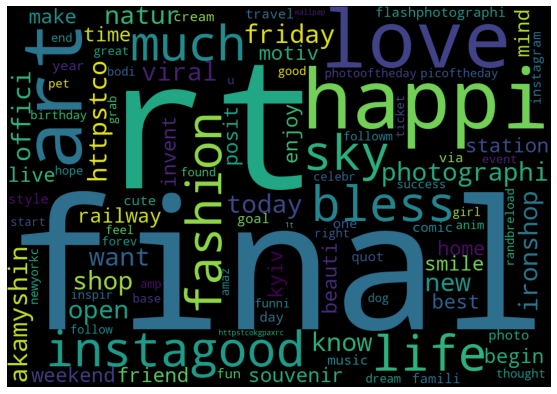

In [ ]:
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

listed=df.lemmatized_tweets.sum()

corrected=[k for k, v in collections.Counter(listed).items() if v > 20]


unique_string=(" ").join(corrected)
wordcloud = WordCloud(width = 1000, height = 700).generate(unique_string)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()